# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
project_data=project_data.sample(n=50000)
project_data.shape

(50000, 17)

In [6]:
project_data["project_is_approved"].value_counts()

1    42443
0     7557
Name: project_is_approved, dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
33884,172066,p031287,6d6cb5cbb6bc66fd4cdb436a7e7fcd49,Mrs.,AL,2016-06-26 21:14:17,Grades 3-5,Flexible Seating Frenzy!,How do I begin describing my students? Each y...,High Five for Flexible Seating!! In order to s...,NaN,NaN,My students need a variety of flexible seating...,0,1,Literacy_Language Math_Science,Literacy Mathematics,How do I begin describing my students? Each y...
56211,60946,p162287,0c528e32d8e206705a38f93f81d35cc5,Ms.,MA,2016-08-25 08:08:31,Grades 3-5,Art Across the Curriculum: Intersecting Scien...,"If the world is supposed to be their oyster, I...",Combining content areas such as science and so...,NaN,NaN,My students need art supplies to create cross-...,2,1,History_Civics Music_Arts,SocialSciences VisualArts,"If the world is supposed to be their oyster, I..."


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

How do I begin describing my students?  Each year brings though my door such a unique medley of personalities, potentials and learning styles that I often say teach me more about myself than I have taught them academically all year.  They grow to be a part of who I am as a person.  I have such a blend of alternative learners, students with attention hurdles, sensory issues alongside traditional learners.\r\n\r\nThe best part about watching my students interact with each other is watching how much they care for, respect, and learn from one other.  \r\n\r\nWhich is why I want to do my best to meet all of their needs!High Five for Flexible Seating!! In order to students to obtain the most from their learning environment, teachers know we must use all means necessary to engage our learners. It's no secret that with increased demands in the classroom, our kids are spending less time MOVING.  All of these pent up energies can get in the way of their processing.  By adding this whole-body sen

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My students are amazing group of kids. They wonder about the world around them.  Some have never even left the state.  They want to know more.   When we are able to get technology, they seek out and explore many different research topics.  They want to learn more and nothing will stop them.\r\nThey are some of the most caring people I have ever had the chance of working with.  They are compassionate and love helping everyone around them.  They care because they want to see change in the world.I have learned that file folder games are an amazing way to keep kids focus and learning longer than any worksheet can.  Kids do not think that they are learning, they view it as a game.  \r\nFolder games are a great way to implement the learning for my students. I am also able to bring out a game for quick finishers. They are also useful for review of a topic that we may not have used in a few months. \r\nKids learn to work together and problem solve when using file folder games. Kids love them m

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are amazing group of kids. They wonder about the world around them.  Some have never even left the state.  They want to know more.   When we are able to get technology, they seek out and explore many different research topics.  They want to learn more and nothing will stop them.  They are some of the most caring people I have ever had the chance of working with.  They are compassionate and love helping everyone around them.  They care because they want to see change in the world.I have learned that file folder games are an amazing way to keep kids focus and learning longer than any worksheet can.  Kids do not think that they are learning, they view it as a game.    Folder games are a great way to implement the learning for my students. I am also able to bring out a game for quick finishers. They are also useful for review of a topic that we may not have used in a few months.   Kids learn to work together and problem solve when using file folder games. Kids love them most im

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are amazing group of kids They wonder about the world around them Some have never even left the state They want to know more When we are able to get technology they seek out and explore many different research topics They want to learn more and nothing will stop them They are some of the most caring people I have ever had the chance of working with They are compassionate and love helping everyone around them They care because they want to see change in the world I have learned that file folder games are an amazing way to keep kids focus and learning longer than any worksheet can Kids do not think that they are learning they view it as a game Folder games are a great way to implement the learning for my students I am also able to bring out a game for quick finishers They are also useful for review of a topic that we may not have used in a few months Kids learn to work together and problem solve when using file folder games Kids love them most importantly Kids are eager to le

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())
project_data["essay"]=preprocessed_essays    

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:52<00:00, 950.26it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'students amazing group kids wonder world around never even left state want know able get technology seek explore many different research topics want learn nothing stop caring people ever chance working compassionate love helping everyone around care want see change world learned file folder games amazing way keep kids focus learning longer worksheet kids not think learning view game folder games great way implement learning students also able bring game quick finishers also useful review topic may not used months kids learn work together problem solve using file folder games kids love importantly kids eager learn ask use time nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())
project_data["project_title"]=preprocessed_titles    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 16935.17it/s]


In [21]:
preprocessed_titles[:5]

['flexible seating frenzy',
 'art across curriculum intersecting science social studies',
 'floor seating flexible classroom',
 'good start great year',
 'cd drives educational computer games']

## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 34790.64it/s]


['AL', 'MA', 'VA', 'MO', 'NY', 'ID', 'NC', 'MD', 'CA', 'GA', 'OK', 'CO', 'MA', 'LA', 'CA']


In [24]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 41568.15it/s]


['Mrs', 'Ms', 'Mrs', 'Mrs', 'Mr', 'Ms', 'Mrs', 'Ms', 'Ms', 'Ms', 'Mrs', 'Mr', 'Ms', 'Mrs', 'Ms']


In [25]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])

['Grades 3-5' 'Grades 3-5' 'Grades 3-5' ... 'Grades 6-8' 'Grades PreK-2'
 'Grades 3-5']


100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 41568.15it/s]


['Grades35', 'Grades35', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'Grades68', 'Grades35', 'GradesPreK2', 'Grades35', 'Grades68', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades68', 'GradesPreK2', 'Grades68', 'GradesPreK2', 'Grades35', 'Grades35', 'Grades35']


### 1.5.3 Vectorizing Numerical features

In [26]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

__ Computing Sentiment Scores__

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
project_data=project_data[["teacher_number_of_previously_posted_projects","price","quantity","clean_categories","clean_subcategories","project_title","essay","project_is_approved"]]
project_data["teacher_prefix"]=preprocessed_teacher_prefix
project_data["school_state"]=preprocessed_school_state
project_data["project_grade_category"]=preprocessed_project_grade

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
target=project_data["project_is_approved"].values
data=project_data.drop("project_is_approved",axis=1)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=0)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [30]:
x_train.columns

Index(['teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'project_title', 'essay',
       'teacher_prefix', 'school_state', 'project_grade_category'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_1=StandardScaler().fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_train=scaler_1.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_test=scaler_1.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

scaler_2=StandardScaler().fit(x_train["price"].values.reshape(-1,1))
price_train=scaler_2.transform(x_train["price"].values.reshape(-1,1))
price_test=scaler_2.transform(x_test["price"].values.reshape(-1,1))

scaler_3=StandardScaler().fit(x_train["quantity"].values.reshape(-1,1))
quantity_train=scaler_3.transform(x_train["quantity"].values.reshape(-1,1))
quantity_test=scaler_3.transform(x_test["quantity"].values.reshape(-1,1))

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer_1=CountVectorizer(lowercase=False,binary=True).fit(x_train["teacher_prefix"].values)
teacher_prefix_train=vectorizer_1.transform(x_train["teacher_prefix"].values)
teacher_prefix_test=vectorizer_1.transform(x_test["teacher_prefix"].values)

vectorizer_2=CountVectorizer(lowercase=False,binary=True).fit(x_train["school_state"].values)
school_state_train=vectorizer_2.transform(x_train["school_state"].values)
school_state_test=vectorizer_2.transform(x_test["school_state"].values)

vectorizer_3=CountVectorizer(lowercase=False,binary=True).fit(x_train["project_grade_category"].values)
project_grade_train=vectorizer_3.transform(x_train["project_grade_category"].values)
project_grade_test=vectorizer_3.transform(x_test["project_grade_category"].values)

vectorizer_4=CountVectorizer(lowercase=False,binary=True).fit(x_train["clean_categories"].values)
clean_categories_train=vectorizer_4.transform(x_train["clean_categories"].values)
clean_categories_test=vectorizer_4.transform(x_test["clean_categories"].values)

vectorizer_5=CountVectorizer(lowercase=False,binary=True).fit(x_train["clean_subcategories"].values)
clean_subcategories_train=vectorizer_5.transform(x_train["clean_subcategories"].values)
clean_subcategories_test=vectorizer_5.transform(x_test["clean_subcategories"].values)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [32]:
count_vect_titles=CountVectorizer(min_df=5)
train_title_bow=count_vect_titles.fit_transform(x_train["project_title"].values)
test_title_bow=count_vect_titles.transform(x_test["project_title"].values)
count_vect_essays=CountVectorizer(min_df=10)
train_essay_bow=count_vect_essays.fit_transform(x_train["essay"].values)
test_essay_bow=count_vect_essays.transform(x_test["essay"].values)

In [33]:
print(train_title_bow.shape)
print(test_title_bow.shape)
print(train_essay_bow.shape)
print(test_essay_bow.shape)

(35000, 2592)
(15000, 2592)
(35000, 10539)
(15000, 10539)


In [34]:
tfidf_vect_titles=TfidfVectorizer(min_df=5)
train_title_tfidf=tfidf_vect_titles.fit_transform(x_train["project_title"].values)
test_title_tfidf=tfidf_vect_titles.transform(x_test["project_title"].values)
tfidf_vect_essays=TfidfVectorizer(min_df=10)
train_essay_tfidf=tfidf_vect_essays.fit_transform(x_train["essay"].values)
test_essay_tfidf=tfidf_vect_essays.transform(x_test["essay"].values)

In [35]:
print(train_title_tfidf.shape)
print(test_title_tfidf.shape)
print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

(35000, 2592)
(15000, 2592)
(35000, 10539)
(15000, 10539)


In [36]:
train_title_list=[]
for i in x_train["project_title"].values:
    train_title_list.append(i.split())
w2v_model_titles=Word2Vec(train_title_list,min_count=5,size=50)
title_w2v_words=w2v_model_titles.wv.vocab

train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:01<00:00, 31515.48it/s]


35000
50


In [37]:
test_avg_w2v_vectors_titles = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 27179.58it/s]


15000
50


In [38]:
train_essay_list=[]
for i in x_train["essay"].values:
    train_essay_list.append(i.split())
    
w2v_model_essays=Word2Vec(train_essay_list,min_count=10,size=50)

essay_w2v_words=w2v_model_essays.wv.vocab
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [00:46<00:00, 754.27it/s]


35000
50


In [39]:
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:19<00:00, 779.29it/s]


15000
50


In [40]:
tfidf_model_titles = TfidfVectorizer()
tfidf_matrix_train_title=tfidf_model_titles.fit_transform(x_train["project_title"].values)
tfidf_matrix_test_title=tfidf_model_titles.transform(x_test["project_title"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_t = dict(zip(tfidf_model_titles.get_feature_names(), list(tfidf_model_titles.idf_)))
tfidf_words_titles = set(tfidf_model_titles.get_feature_names())

train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_titles.append(vector)

print(len(train_tfidf_w2v_vectors_titles))
print(len(train_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:02<00:00, 11974.52it/s]


35000
50


In [41]:
test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_titles.append(vector)

print(len(test_tfidf_w2v_vectors_titles))
print(len(test_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:01<00:00, 13603.20it/s]


15000
50


In [42]:
tfidf_model_essay = TfidfVectorizer()
tfidf_matrix_essay_train=tfidf_model_essay.fit_transform(x_train["essay"].values)
tfidf_matrix_essay_test=tfidf_model_essay.transform(x_test["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_e = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay= set(tfidf_model_essay.get_feature_names())

train_tfidf_w2v_vectors_essays = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_essays.append(vector)

print(len(train_tfidf_w2v_vectors_essays))
print(len(train_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [02:44<00:00, 212.93it/s]


35000
50


In [43]:
test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_essays.append(vector)

print(len(test_tfidf_w2v_vectors_essays))
print(len(test_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:10<00:00, 213.67it/s]


15000
50


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Applying SGDClassifier on set-1

In [44]:
from scipy.sparse import hstack
train_set_1=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_title_bow,train_essay_bow))
test_set_1=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_title_bow,test_essay_bow))

In [62]:
from sklearn.linear_model import SGDClassifier

In [46]:
param_grid={"alpha":[10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4],"penalty":["l1","l2"]}
model_1=GridSearchCV(SGDClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'penalty

In [47]:
print(model_1.best_estimator_)
print(model_1.best_params_)

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'alpha': 0.01, 'penalty': 'l2'}


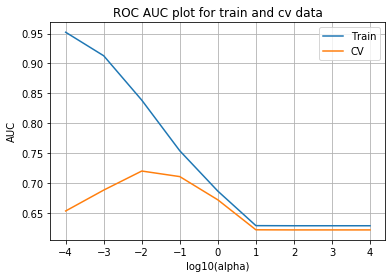

In [48]:
import seaborn as sns
train_auc_score_1=[n for i,n in enumerate(list(model_1.cv_results_["mean_train_score"])) if i%2!=0]
cv_auc_score_1=[m for i,m in enumerate(list(model_1.cv_results_["mean_test_score"])) if i%2!=0]
plt.plot(np.log10(param_grid["alpha"]),train_auc_score_1,label="Train")
plt.plot(np.log10(param_grid["alpha"]),cv_auc_score_1,label="CV")
plt.title("ROC AUC plot for train and cv data")
plt.xlabel("log10(alpha)")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

In [49]:
final_model_1=model_1.best_estimator_
final_model_1.fit(train_set_1,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
print("Train AUC score : ",final_model_1.score(train_set_1,y_train))

Train AUC score :  0.7771714285714286


In [51]:
print("Test AUC score : ",final_model_1.score(test_set_1,y_test))

Test AUC score :  0.7256666666666667


In [52]:
from sklearn.calibration import CalibratedClassifierCV
ca_model_1 = CalibratedClassifierCV(final_model_1)
ca_model_1.fit(train_set_1,y_train)
pred_train_1=ca_model_1.predict(train_set_1)
prob_train_1=ca_model_1.predict_proba(train_set_1)
pred_test_1=ca_model_1.predict(test_set_1)
prob_test_1=ca_model_1.predict_proba(test_set_1)

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_1[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.8361324047706591
Roc auc score on test data :  0.7174494514093309


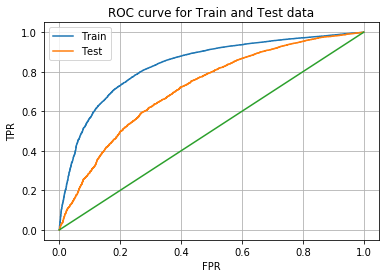

In [54]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

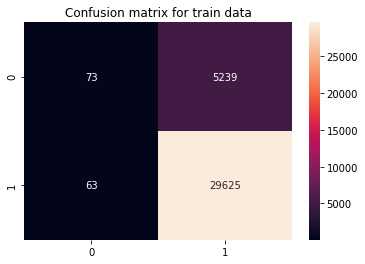

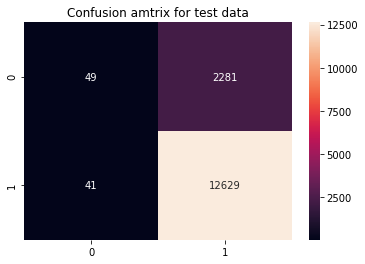

In [55]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,pred_train_1),annot=True,fmt="d")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_1),annot=True,fmt="d")
plt.title("Confusion amtrix for test data")
plt.show()

# Applying SGDClassifier on set-2

In [56]:
train_set_2=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_title_tfidf,train_essay_tfidf))
test_set_2=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_title_tfidf,test_essay_tfidf))

In [57]:
model_2=GridSearchCV(SGDClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_2.fit(train_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'penalty

In [58]:
print(model_2.best_estimator_)
print("="*50)
print(model_2.best_params_)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'alpha': 0.0001, 'penalty': 'l1'}


In [59]:
print("Train AUC score : ",model_2.score(train_set_2,y_train))
print("="*50)
print("Test AUC score : ",model_2.score(test_set_2,y_test))

Train AUC score :  0.7889697495012385
Test AUC score :  0.7139276314229483


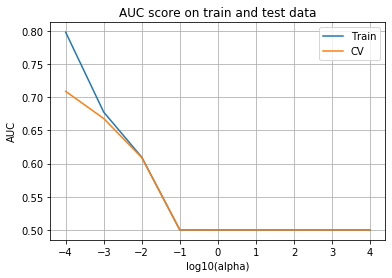

In [60]:
train_AUC_score_2=[n for i,n in enumerate(model_2.cv_results_["mean_train_score"]) if i%2==0]
cv_AUC_score_2=[m for i,m in enumerate(model_2.cv_results_["mean_test_score"]) if i%2==0]
plt.plot(np.log10(param_grid["alpha"]),train_AUC_score_2,label="Train")
plt.plot(np.log10(param_grid["alpha"]),cv_AUC_score_2,label="CV")
plt.title("AUC score on train and test data")
plt.xlabel("log10(alpha)")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

In [61]:
final_model_2=model_2.best_estimator_
final_model_2.fit(train_set_2,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
ca_model_2 = CalibratedClassifierCV(final_model_2)
ca_model_2.fit(train_set_2,y_train)
pred_train_2=ca_model_2.predict(train_set_2)
prob_train_2=ca_model_2.predict_proba(train_set_2)
pred_test_2=ca_model_2.predict(test_set_2)
prob_test_2=ca_model_2.predict_proba(test_set_2)

In [63]:
print(final_model_2.score(train_set_2,y_train))
print(final_model_2.score(test_set_2,y_test))
print("="*50)
print(roc_auc_score(y_train,prob_train_2[:,1]))
print(roc_auc_score(y_test,prob_test_2[:,1]))

0.6877142857142857
0.6491333333333333
0.8096097443025945
0.7143714834474325


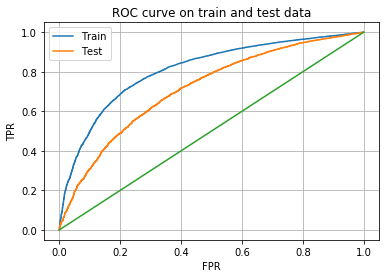

In [64]:
train_fpr_2,train_tpr_2,thresholds=roc_curve(y_train,prob_train_2[:,1])
test_fpr_2,test_tpr_2,thresholds=roc_curve(y_test,prob_test_2[:,1])
plt.plot(train_fpr_2,train_tpr_2,label="Train")
plt.plot(test_fpr_2,test_tpr_2,label="Test")
plt.title("ROC curve on train and test data")
plt.plot((0.0,1.0),(0.0,1.0))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()

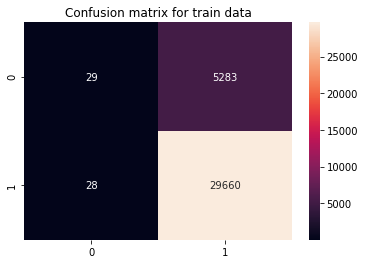

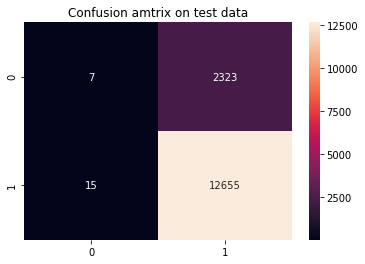

In [65]:
sns.heatmap(confusion_matrix(y_train,pred_train_2),annot=True,fmt="d")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_2),annot=True,fmt="d")
plt.title("Confusion amtrix on test data")
plt.show()

# Applying SGDClassifier on set-3

In [66]:
train_set_3=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_avg_w2v_vectors_titles,train_avg_w2v_vectors_essays))
test_set_3=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_avg_w2v_vectors_titles,test_avg_w2v_vectors_essays))

In [67]:
model_3=GridSearchCV(SGDClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_3.fit(train_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'penalty

In [68]:
print(model_3.best_estimator_)
print("="*50)
print(model_3.best_params_)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'alpha': 0.001, 'penalty': 'l1'}


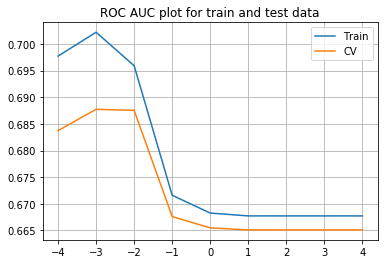

In [69]:
train_auc_score_3=[n for i,n in enumerate(model_3.cv_results_["mean_train_score"]) if i%2!=0]
cv_auc_score_3=[m for i,m in enumerate(model_3.cv_results_["mean_test_score"]) if i%2!=0]
plt.plot(np.log10(param_grid["alpha"]),train_auc_score_3,label="Train")
plt.plot(np.log10(param_grid["alpha"]),cv_auc_score_3,label="CV")
plt.title("ROC AUC plot for train and test data")
plt.grid()
plt.legend()
plt.show()

In [70]:
final_model_3=model_3.best_estimator_
final_model_3.fit(train_set_3,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
print("Train AUC score : ",final_model_3.score(train_set_3,y_train))
print("="*50)
print("Test AUC score : ",final_model_3.score(test_set_3,y_test))

Train AUC score :  0.6886
Test AUC score :  0.6868


In [72]:
ca_model_3=CalibratedClassifierCV(final_model_3)
ca_model_3.fit(train_set_3,y_train)
pred_train_3=ca_model_3.predict(train_set_3)
prob_train_3=ca_model_3.predict_proba(train_set_3)
pred_test_3=ca_model_3.predict(test_set_3)
prob_set_3=ca_model_3.predict_proba(test_set_3)

In [73]:
print(roc_auc_score(y_train,prob_train_3[:,1]))
print(roc_auc_score(y_test,prob_set_3[:,1]))

0.6992783685266531
0.6999173472533204


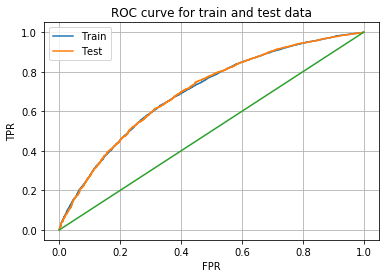

In [74]:
train_fpr_3,train_tpr_3,thresholds=roc_curve(y_train,prob_train_3[:,1])
test_fpr_3,test_tpr_3,thresholds=roc_curve(y_test,prob_set_3[:,1])
plt.plot(train_fpr_3,train_tpr_3,label="Train")
plt.plot(test_fpr_3,test_tpr_3,label="Test")
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("ROC curve for train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

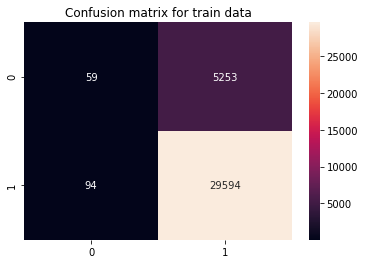

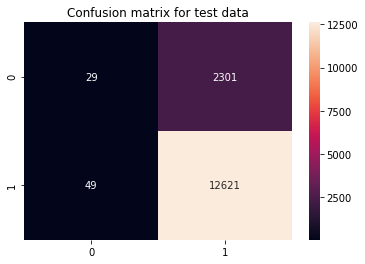

In [75]:
sns.heatmap(confusion_matrix(y_train,pred_train_3),annot=True,fmt="d")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_3),annot=True,fmt="d")
plt.title("Confusion matrix for test data")
plt.show()

# Applying SGDClassifier on set-4

In [76]:
train_set_4=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_tfidf_w2v_vectors_titles,train_tfidf_w2v_vectors_essays))
test_set_4=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_tfidf_w2v_vectors_titles,test_tfidf_w2v_vectors_essays))

In [77]:
model_4=GridSearchCV(SGDClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_4.fit(train_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'penalty

In [78]:
print(model_4.best_estimator_)
print("="*50)
print(model_4.best_params_)

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'alpha': 0.01, 'penalty': 'l2'}


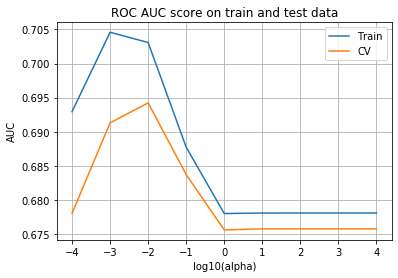

In [79]:
train_auc_score_4=[n for i,n in enumerate(model_4.cv_results_["mean_train_score"]) if i%2!=0]
test_auc_score_4=[m for i,m in enumerate(model_4.cv_results_["mean_test_score"]) if i%2!=0]
plt.plot(np.log10(param_grid["alpha"]),train_auc_score_4,label="Train")
plt.plot(np.log10(param_grid["alpha"]),test_auc_score_4,label="CV")
plt.title("ROC AUC score on train and test data")
plt.xlabel("log10(alpha)")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

In [80]:
final_model_4=model_4.best_estimator_
final_model_4.fit(train_set_4,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
print(final_model_4.score(train_set_4,y_train))
print(final_model_4.score(test_set_4,y_test))

0.6169714285714286
0.6124666666666667


In [82]:
ca_model_4=CalibratedClassifierCV(final_model_4)
ca_model_4.fit(train_set_4,y_train)
pred_train_4=ca_model_4.predict(train_set_4)
prob_train_4=ca_model_4.predict_proba(train_set_4)
pred_test_4=ca_model_4.predict(test_set_4)
prob_test_4=ca_model_4.predict_proba(test_set_4)

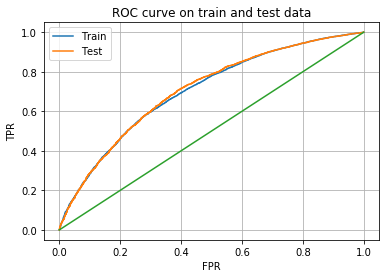

In [83]:
train_fpr_4,train_tpr_4,thresholds=roc_curve(y_train,prob_train_4[:,1])
test_fpr_4,test_tpr_4,thresholds=roc_curve(y_test,prob_test_4[:,1])
plt.plot(train_fpr_4,train_tpr_4,label="Train")
plt.plot(test_fpr_4,test_tpr_4,label="Test")
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("ROC curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

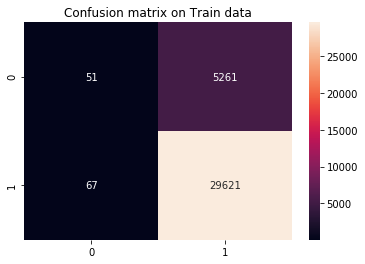

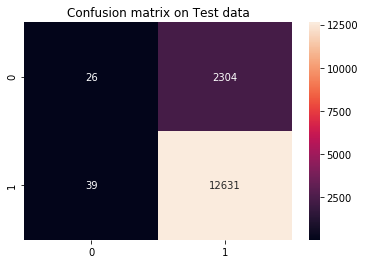

In [84]:
sns.heatmap(confusion_matrix(y_train,pred_train_4),annot=True,fmt="d")
plt.title("Confusion matrix on Train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_4),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [36]:
num_words_title_train=[]
for title in x_train["project_title"].values:
    num_words_title_train.append(len(title.split(' ')))
num_words_title_test=[]
for title in x_test["project_title"].values:
    num_words_title_test.append(len(title.split(" ")))
num_words_essay_train=[]
for essay in x_train["essay"].values:
    num_words_essay_train.append(len(essay.split(' ')))
num_words_essay_test=[]
for essay in x_test["essay"].values:
    num_words_essay_test.append(len(essay.split(" ")))
    

In [37]:
scaler_10=StandardScaler().fit(np.array(num_words_title_train).reshape(-1,1))
n_w_t_train=scaler_10.transform(np.array(num_words_title_train).reshape(-1,1))
n_w_t_test=scaler_10.transform(np.array(num_words_title_test).reshape(-1,1))
scaler_20=StandardScaler().fit(np.array(num_words_essay_train).reshape(-1,1))
n_w_e_train=scaler_20.transform(np.array(num_words_essay_train).reshape(-1,1))
n_w_e_test=scaler_20.transform(np.array(num_words_essay_test).reshape(-1,1))

In [38]:
sia=SentimentIntensityAnalyzer()
sentiment_train_score=[]
for essay in x_train["essay"].values:
    sentiment_train_score.append(sia.polarity_scores(essay))
sentiment_train_score_=[]
for essay in sentiment_train_score:
    sentiment_train_score_.append(list(essay.values()))
sentiment_test_score=[]
for essay in x_test["essay"].values:
    sentiment_test_score.append(sia.polarity_scores(essay))
sentiment_test_score_=[]
for essay in sentiment_test_score:
    sentiment_test_score_.append(list(essay.values()))
    

In [45]:
scaler_30=StandardScaler().fit(sentiment_train_score_)
sentiment_score_train=scaler_30.transform(sentiment_train_score_)
sentiment_score_test=scaler_30.transform(sentiment_test_score_)

In [46]:
from scipy.linalg import eigh
covar_matrix=np.matmul(train_essay_tfidf.toarray().T,train_essay_tfidf.toarray())
print(covar_matrix.shape)

(10539, 10539)


In [47]:
eigh_values,eigh_vectors=eigh(covar_matrix)

In [48]:
eigh_values=eigh_values[::-1]

In [49]:
percentage_explained_variance=eigh_values/np.sum(eigh_values)
print(percentage_explained_variance)

[ 7.85355747e-02  1.00222003e-02  8.42811387e-03 ...  2.64118010e-07
 -4.36955760e-22 -1.55294948e-20]


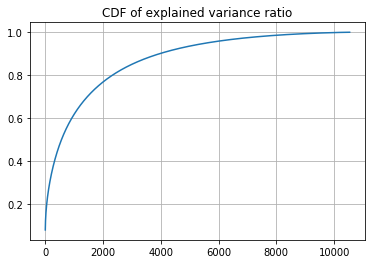

In [52]:
cumsum_variance=np.cumsum(percentage_explained_variance)
plt.plot(cumsum_variance)
plt.grid()
plt.title("CDF of explained variance ratio")
plt.show()

In [53]:
print(np.sum(percentage_explained_variance[:3000]))

0.8506511281192655


I took top 3000 dimensions of TfidfVectorized data of Essay which preserve 85% variance.

In [54]:
eigh_vectors=eigh_vectors[len(eigh_vectors)-3000:]
print(eigh_vectors.shape)

(3000, 10539)


In [55]:
new_essay_train=np.matmul(train_essay_tfidf.toarray(),eigh_vectors.T)

In [56]:
new_essay_test=np.matmul(test_essay_tfidf.toarray(),eigh_vectors.T)

In [57]:
new_essay_test.shape

(15000, 3000)

In [58]:
'''
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=3000)
tsvd_essay_train=tsvd.fit_transform(train_essay_tfidf)
'''

'\nfrom sklearn.decomposition import TruncatedSVD\ntsvd=TruncatedSVD(n_components=3000)\ntsvd_essay_train=tsvd.fit_transform(train_essay_tfidf)\n'

<b><font color="red">I did not use TruncatedSVD because it takes lot of time,and create memory error.</font></b>

In [58]:
from scipy.sparse import hstack
train_set_5=hstack((school_state_train,clean_categories_train,clean_subcategories_train,project_grade_train,teacher_prefix_train,quantity_train,tnoppp_train,price_train,sentiment_score_train,n_w_t_train,n_w_e_train,new_essay_train))
test_set_5=hstack((school_state_test,clean_categories_test,clean_subcategories_test,project_grade_test,teacher_prefix_test,quantity_test,tnoppp_test,price_test,sentiment_score_test,n_w_t_test,n_w_e_test,new_essay_test))

In [59]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
param_grid={"alpha":[10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4],"penalty":["l1","l2"]}
model_5=GridSearchCV(SGDClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_5.fit(train_set_5,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'penalty

In [60]:
print(model_5.best_estimator_)
print("="*50)
print(model_5.best_params_)
print("="*50)
print("Train AUC score : ",model_5.score(train_set_5,y_train))
print("="*50)
print("Test AUC score : ",model_5.score(test_set_5,y_test))

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'alpha': 0.0001, 'penalty': 'l2'}
Train AUC score :  0.7366584529261064
Test AUC score :  0.690375354796501


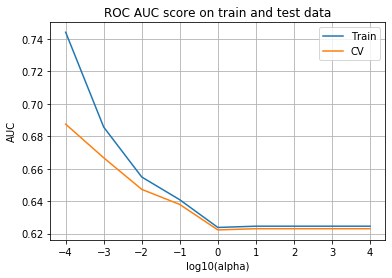

In [61]:
train_auc_score_5=[n for i,n in enumerate(model_5.cv_results_["mean_train_score"]) if i%2!=0]
test_auc_score_5=[m for i,m in enumerate(model_5.cv_results_["mean_test_score"]) if i%2!=0]
plt.plot(np.log10(param_grid["alpha"]),train_auc_score_5,label="Train")
plt.plot(np.log10(param_grid["alpha"]),test_auc_score_5,label="CV")
plt.title("ROC AUC score on train and test data")
plt.xlabel("log10(alpha)")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

In [62]:
final_model_5=model_5.best_estimator_

In [63]:
from sklearn.calibration import CalibratedClassifierCV
ca_model_5=CalibratedClassifierCV(final_model_5)
ca_model_5.fit(train_set_5,y_train)
pred_train_5=ca_model_5.predict(train_set_5)
prob_train_5=ca_model_5.predict_proba(train_set_5)
pred_test_5=ca_model_5.predict(test_set_5)
prob_test_5=ca_model_5.predict_proba(test_set_5)

In [66]:
print("AUC score for Train Data : ",ca_model_5.score(train_set_5,y_train))
print("="*50)
print("AUC score for Test Data : ",ca_model_5.score(test_set_5,y_test))

AUC score for Train Data :  0.8472285714285714
AUC score for Test Data :  0.85


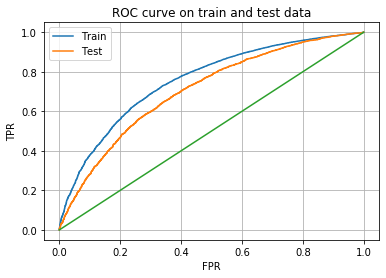

In [64]:
from sklearn.metrics import roc_curve,confusion_matrix
train_fpr_5,train_tpr_5,thresholds=roc_curve(y_train,prob_train_5[:,1])
test_fpr_5,test_tpr_5,thresholds=roc_curve(y_test,prob_test_5[:,1])
plt.plot(train_fpr_5,train_tpr_5,label="Train")
plt.plot(test_fpr_5,test_tpr_5,label="Test")
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("ROC curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

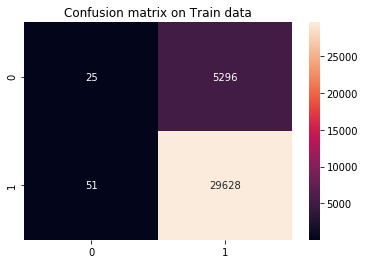

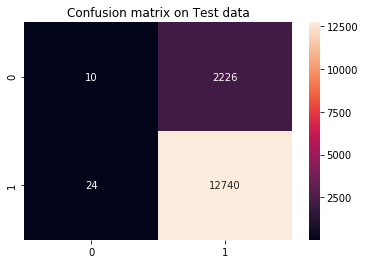

In [65]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,pred_train_5),annot=True,fmt="d")
plt.title("Confusion matrix on Train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_5),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

<h1>3. Conclusion</h1>

In [70]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["Model","Alpha","Penalty","Train AUC score","Test AUC score"]
table.add_row(["SGDClassifier",0.01,"l2",0.77,0.72])
table.add_row(["SGDClassifier",0.0001,"l1",0.78,0.71])
table.add_row(["SGDClassifier",0.001,"l1",0.68,0.68])
table.add_row(["SGDClassifier",0.1,"l2",0.62,0.61])
table.add_row(["SGDClassifier",0.0001,"l2",0.73,0.69])
print(table)

+---------------+--------+---------+-----------------+----------------+
|     Model     | Alpha  | Penalty | Train AUC score | Test AUC score |
+---------------+--------+---------+-----------------+----------------+
| SGDClassifier |  0.01  |    l2   |       0.77      |      0.72      |
| SGDClassifier | 0.0001 |    l1   |       0.78      |      0.71      |
| SGDClassifier | 0.001  |    l1   |       0.68      |      0.68      |
| SGDClassifier |  0.1   |    l2   |       0.62      |      0.61      |
| SGDClassifier | 0.0001 |    l2   |       0.73      |      0.69      |
+---------------+--------+---------+-----------------+----------------+
